### Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

#### Reading file

In [49]:
df = pd.read_csv(r"C:\Users\bhavy\Downloads\loan_data.csv")
df.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [41]:
# Consise Summery

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Here we can see that attribute purpose has object datatype. We need to deal with it.

In [42]:
# Summary
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Checking For Null Values


In [43]:
df.isnull().sum().sum()

0

In [44]:
# unique values in purpose attribute

df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

It has **6 unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(5).

In [48]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Data Visualization

Text(0.5, 0, 'FICO')

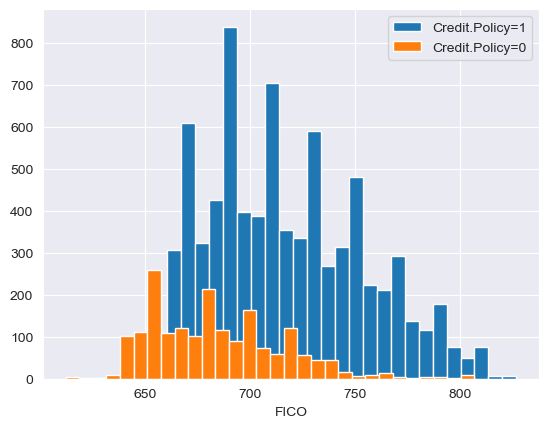

In [8]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

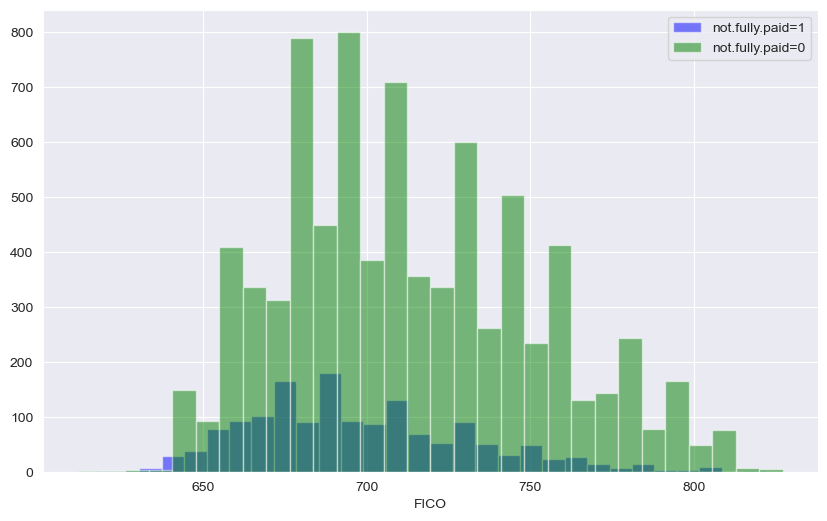

In [9]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

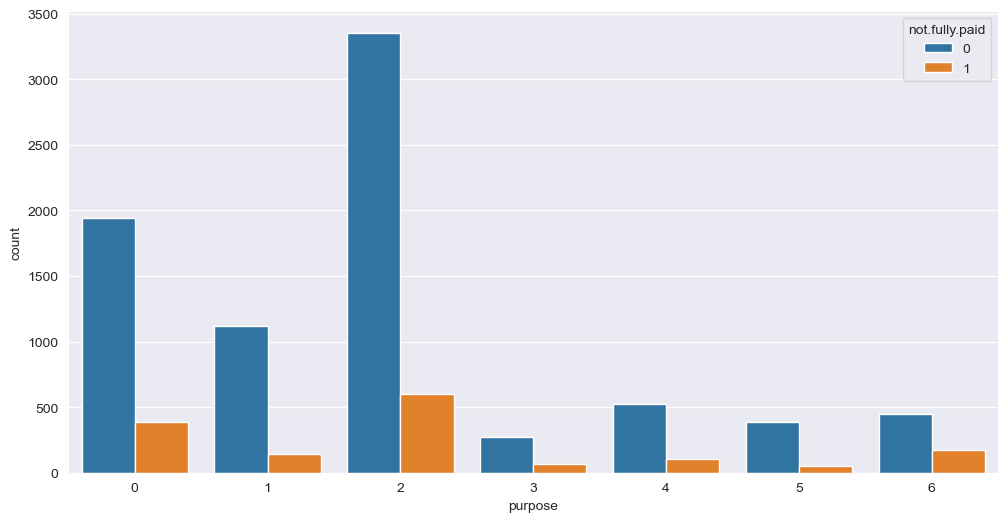

In [10]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

<Figure size 1000x600 with 0 Axes>

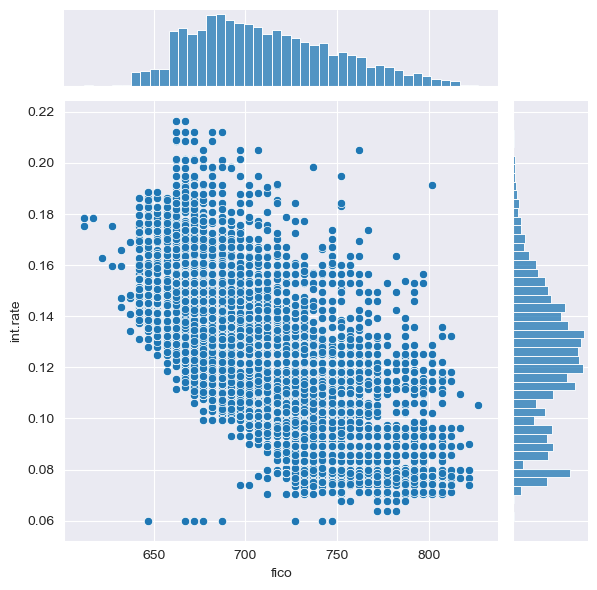

In [11]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

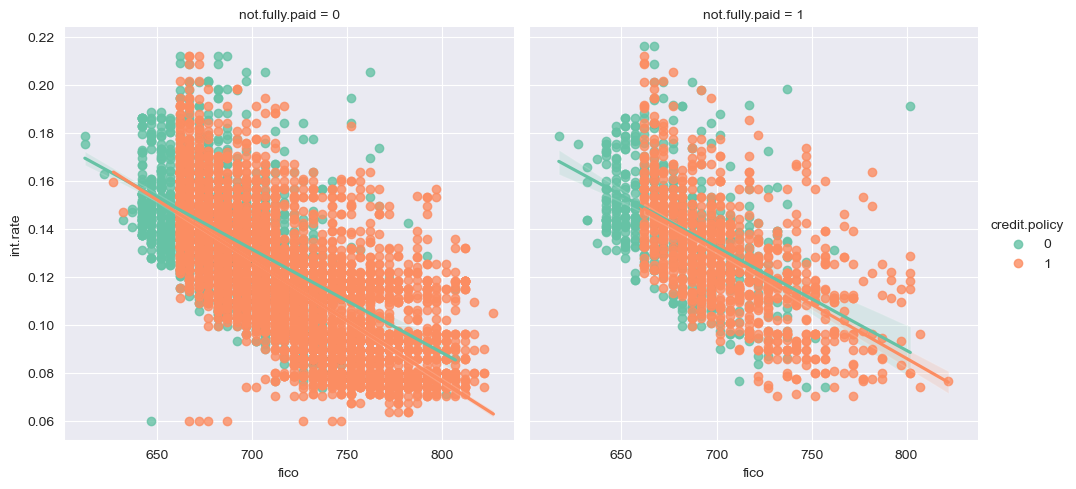

In [12]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

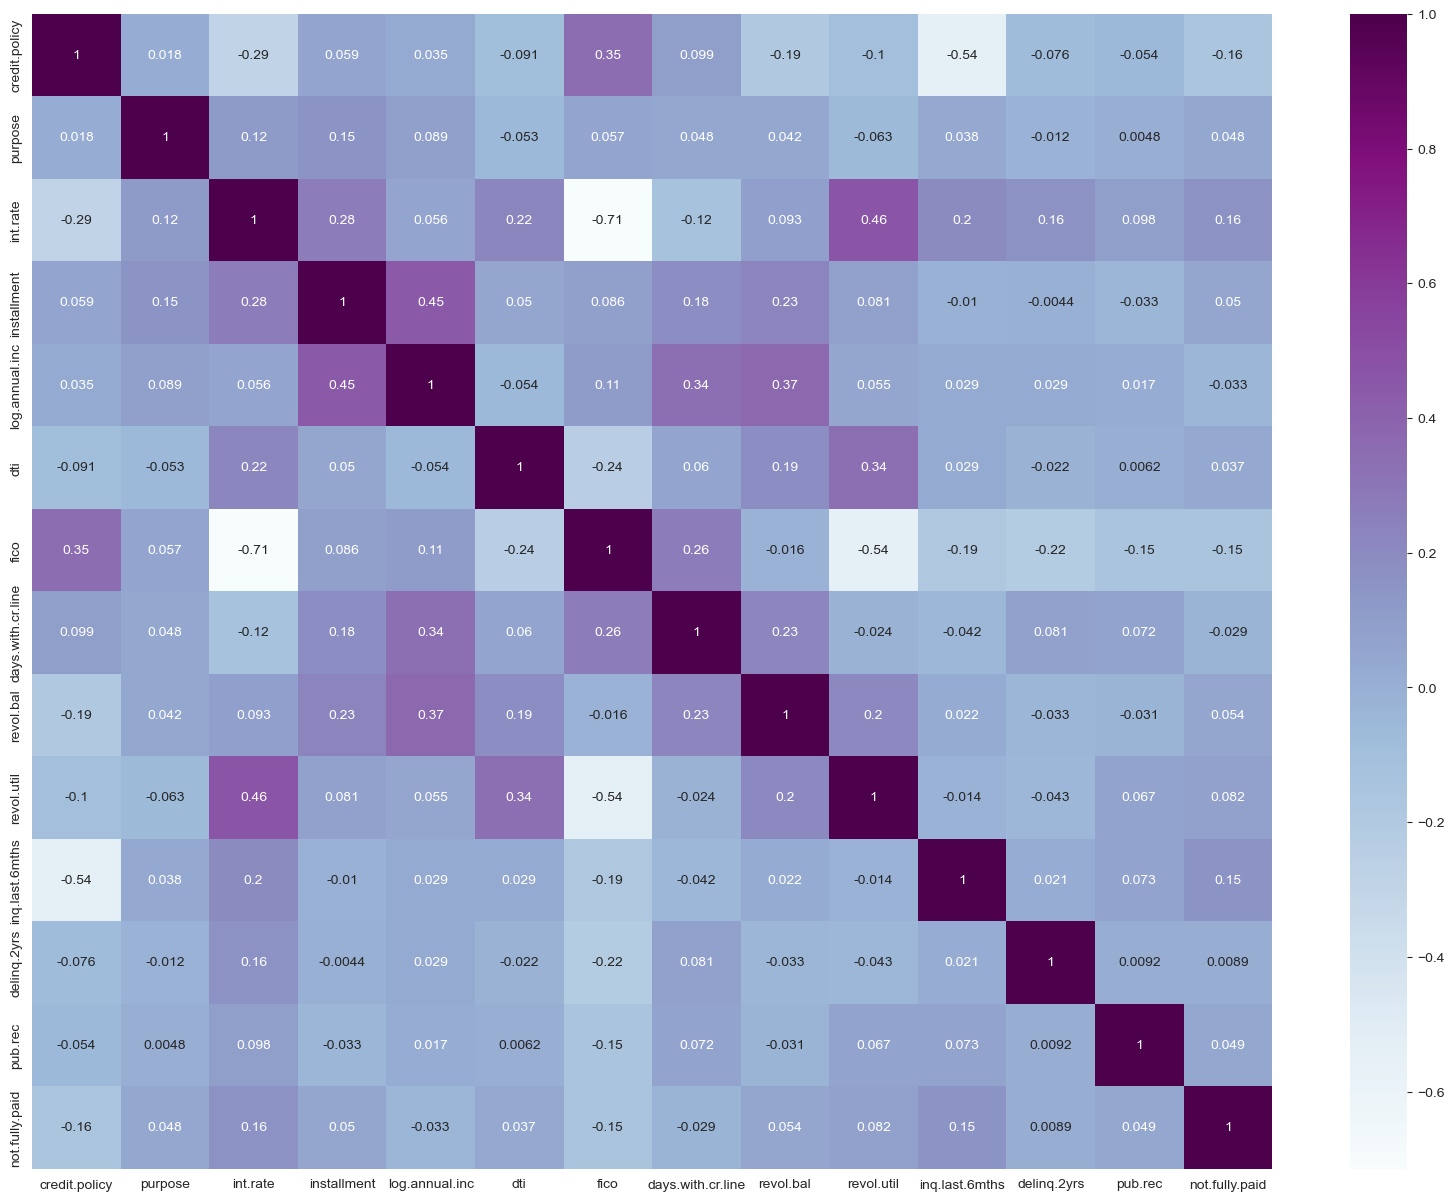

In [13]:
plt.figure(figsize = (20, 15)) 
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.gully.paid)



### Train-Test Split

Splitting the dataset for training and testing purpose.

In [14]:
# Dropping target class

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Modellng

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,
                                       20]},
             return_train_score=True, scoring='recall_weighted')

In [17]:
grid_search.best_params_

{'max_depth': 2}

In [18]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [19]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2431    0]
 [ 443    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8374105011933174
Test Accuracy score: 0.8458594293667363


We got **Accuracy of 84.58%** using Decision Tree Classifier.

### **Bagging** with Decision Tree

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,bootstrap=True)
score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.7310162599410215


Bagging is not improving the score of model and giving only **73.10% of mean Score.**

### **AdaBoosting** with Decision Tree

In [21]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.84


It giving the same result of **84%** and not improving our Model.

## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [23]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2426    5]
 [ 434    9]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.64      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8472512178148921


We got the **Accuracy of 84.7%** with random Forest Classifier

### AdaBoosting with RandomForest

In [24]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
#print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
#print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))
y_pred_train = adaboost_clf.predict(X_train)
y_pred_test = adaboost_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [25]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2420   11]
 [ 435    8]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.42      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8448155880306193


### Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
#print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
#print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [27]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2421   10]
 [ 436    7]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.41      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8448155880306193


While Computing different **Ensemble Learning Technologies**, We Found that Most of the **Bagging and Boosting** algo are giving similar result with minimum difference in accuracy. Even though in all these Ensembles-

We Found that the **Best Model for this DataSet is Random Forest with Accuracy of 85%.**

In [51]:
import joblib

In [52]:
joblib.dump(rf_clf,"loan_repayment_model")

['loan_repayment_model']

In [61]:
import tkinter as tk
from tkinter import messagebox

class LoanPredictorApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Loan Predictor")
        self.master.geometry("400x500")  # Set window size

        # Set background color
        self.master.configure(bg='#f0f0f0')

        self.labels = [
            "credit.policy", "purpose", "int.rate", "installment", 
            "log.annual.inc", "dti", "fico", "days.with.cr.line", 
            "revol.bal", "revol.util", "inq.last.6mths", "delinq.2yrs", 
            "pub.rec"
        ]
        self.entries = {}

        for i, label in enumerate(self.labels):
            tk.Label(master, text=label + ":", bg='#f0f0f0').grid(row=i, column=0, padx=10, pady=5)
            self.entries[label] = tk.Entry(master)
            self.entries[label].grid(row=i, column=1, padx=10, pady=5)

        self.predict_button = tk.Button(master, text="Predict", command=self.predict, bg='#4caf50', fg='white', padx=10, pady=5)
        self.predict_button.grid(row=len(self.labels), columnspan=2, pady=10)

    def predict(self):
        try:
            # Convert input data to match the specified data types
            input_data = {}
            for label, entry in self.entries.items():
                if label in ["purpose"]:  # No conversion needed for 'purpose' since it's already a string
                    input_data[label] = entry.get()
                else:
                    if label in ["fico", "credit.policy", "revol.bal", "inq.last.6mths", "delinq.2yrs", "pub.rec"]:
                        input_data[label] = int(entry.get())
                    else:
                        input_data[label] = float(entry.get())
            
            # Load the ML model
            model = joblib.load("loan_repayment_model")

            # Predict using the loaded model
            prediction = model.predict(list(input_data.values()))

            # Show prediction
            messagebox.showinfo("Prediction", f"The predicted value is {prediction}")
        
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {e}")


def main():
    root = tk.Tk()
    app = LoanPredictorApp(root)
    root.mainloop()


if __name__ == "__main__":
    main()
